## Import packages

In [22]:
import pandas as pd

## Import the breast cancer dataset

In [23]:
dataset = pd.read_csv('breast_cancer.csv')

In [24]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


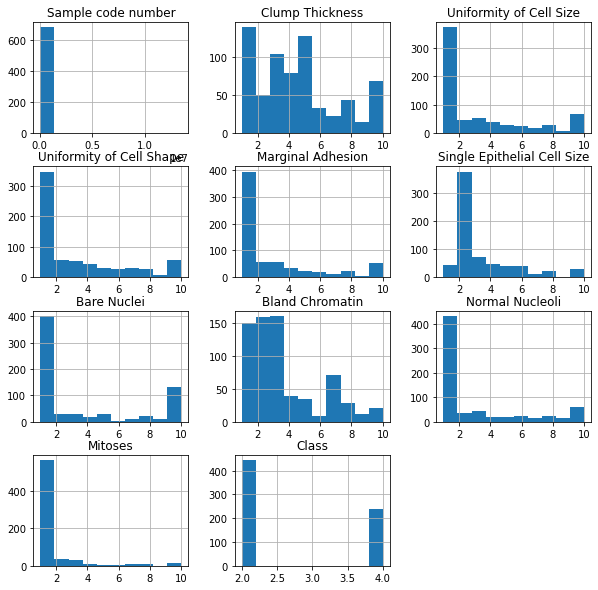

In [33]:
dataset.hist(figsize=(10,10))
plt.show()

## Splitting into Train and Test set

In [25]:
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [27]:
#from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
#X_train = sc_x.fit_transform(X_train)
#X_test = sc_x.transform(X_test)

## Train the logistic regression model 

In [28]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

## Predicting the Test result

In [29]:
y_pred = regressor.predict(X_test)

## Evaluate the model performance using confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[103   5]
 [  4  59]]


## Computing the accuracy with k-fold cross validation

In [35]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.87 %
Standard Deviation: 1.57 %
